In [1]:
import pandas as pd
from src.reader import read_query
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from src.preprocessor import process_data

pd.options.plotting.backend = "plotly"


In [2]:
retrieved_rows = read_query('tonusdt.hourly')

# Preprocess
df = process_data(retrieved_rows)
# df.drop(['date','epoch','second'], axis = 1, inplace = True)
df.head()

Creating conncetion:
Execute select query:
Conncetion closed.


,epoch,open,high,low,close,volume,date,year,month,day,hour,minute,second
0,1728507600000,5.0087,5.0700,4.9970,5.0700,25007.6000,2024-10-10 00:30:00,2024,10,10,0,30,0
1,1728511200000,5.0661,5.0710,5.0515,5.0710,9999.0720,2024-10-10 01:30:00,2024,10,10,1,30,0
2,1728514800000,5.0704,5.0823,5.0659,5.0667,10825.0640,2024-10-10 02:30:00,2024,10,10,2,30,0
3,1728518400000,5.0666,5.0794,5.0373,5.0457,15764.8300,2024-10-10 03:30:00,2024,10,10,3,30,0
4,1728522000000,5.0442,5.0960,5.0442,5.0826,5307.9717,2024-10-10 04:30:00,2024,10,10,4,30,0


In [3]:
df.sort_values(by = 'epoch').plot(kind = 'line', x = 'date', y = 'close')

In [4]:
data = df.sort_values(by = 'epoch').tail(10000).copy()
data, real_test = data[:9990],data[9990:]
data = data.set_index('date')
real_test = real_test.set_index('date')
data

,epoch,open,high,low,close,volume,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2024-01-02 02:30:00,1704150000000,2.3403,2.3500,2.3364,2.3473,9746.5660,2024,1,2,2,30,0
2024-01-02 03:30:00,1704153600000,2.3496,2.3704,2.3480,2.3699,22564.6800,2024,1,2,3,30,0
2024-01-02 04:30:00,1704157200000,2.3703,2.3775,2.3581,2.3657,5038.9097,2024,1,2,4,30,0
2024-01-02 05:30:00,1704160800000,2.3659,2.3687,2.3591,2.3638,2875.8826,2024,1,2,5,30,0
2024-01-02 06:30:00,1704164400000,2.3627,2.3640,2.3548,2.3640,6175.1943,2024,1,2,6,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21 03:30:00,1740096000000,3.6023,3.6050,3.5763,3.5813,73436.2600,2025,2,21,3,30,0
2025-02-21 04:30:00,1740099600000,3.5813,3.5814,3.5512,3.5713,80301.5550,2025,2,21,4,30,0
2025-02-21 05:30:00,1740103200000,3.5721,3.5777,3.5482,3.5537,25250.7800,2025,2,21,5,30,0


In [5]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

fig.show()


In [6]:
data.drop(['epoch','second'], axis = 1, inplace = True)
data

,open,high,low,close,volume,year,month,day,hour,minute
date,,,,,,,,,,
2024-01-02 02:30:00,2.3403,2.3500,2.3364,2.3473,9746.5660,2024,1,2,2,30
2024-01-02 03:30:00,2.3496,2.3704,2.3480,2.3699,22564.6800,2024,1,2,3,30
2024-01-02 04:30:00,2.3703,2.3775,2.3581,2.3657,5038.9097,2024,1,2,4,30
2024-01-02 05:30:00,2.3659,2.3687,2.3591,2.3638,2875.8826,2024,1,2,5,30
2024-01-02 06:30:00,2.3627,2.3640,2.3548,2.3640,6175.1943,2024,1,2,6,30
...,...,...,...,...,...,...,...,...,...,...
2025-02-21 03:30:00,3.6023,3.6050,3.5763,3.5813,73436.2600,2025,2,21,3,30
2025-02-21 04:30:00,3.5813,3.5814,3.5512,3.5713,80301.5550,2025,2,21,4,30
2025-02-21 05:30:00,3.5721,3.5777,3.5482,3.5537,25250.7800,2025,2,21,5,30


In [7]:
for i in range(data.shape[0] - 1):
    data.iloc[i,3] = data.iloc[i+1,3]

In [8]:
sdf = data[:-1].copy()
# sample['close'].rolling(window = 2).mean()
# sample['close'].shift(periods = 1)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
X, y = sdf.drop(['close'],axis = 1),sdf[['close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred_lr = model_lr.predict(X_test)

In [13]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
print("Mean Squared Error Linear Regression:", mse_lr)

Mean Squared Error Linear Regression: 0.0033676068909596494


In [14]:
diff_prediction = pd.DataFrame(
    {
        'y_pred_lr': y_pred_lr.flatten(),
        'y_test': y_test.values.flatten().tolist(),
        'diff_lr': (y_test - y_pred_lr).values.flatten().tolist()
    }
)

diff_prediction

,y_pred_lr,y_test,diff_lr
0,5.383104,5.3857,0.002596
1,5.628957,5.7122,0.083243
2,5.576248,5.5729,-0.003348
3,6.126839,6.1898,0.062961
4,2.292916,2.2108,-0.082116
...,...,...,...
1993,6.811186,6.6637,-0.147486
1994,5.420536,5.4276,0.007064
1995,3.511521,3.5445,0.032979
1996,2.283604,2.2486,-0.035004


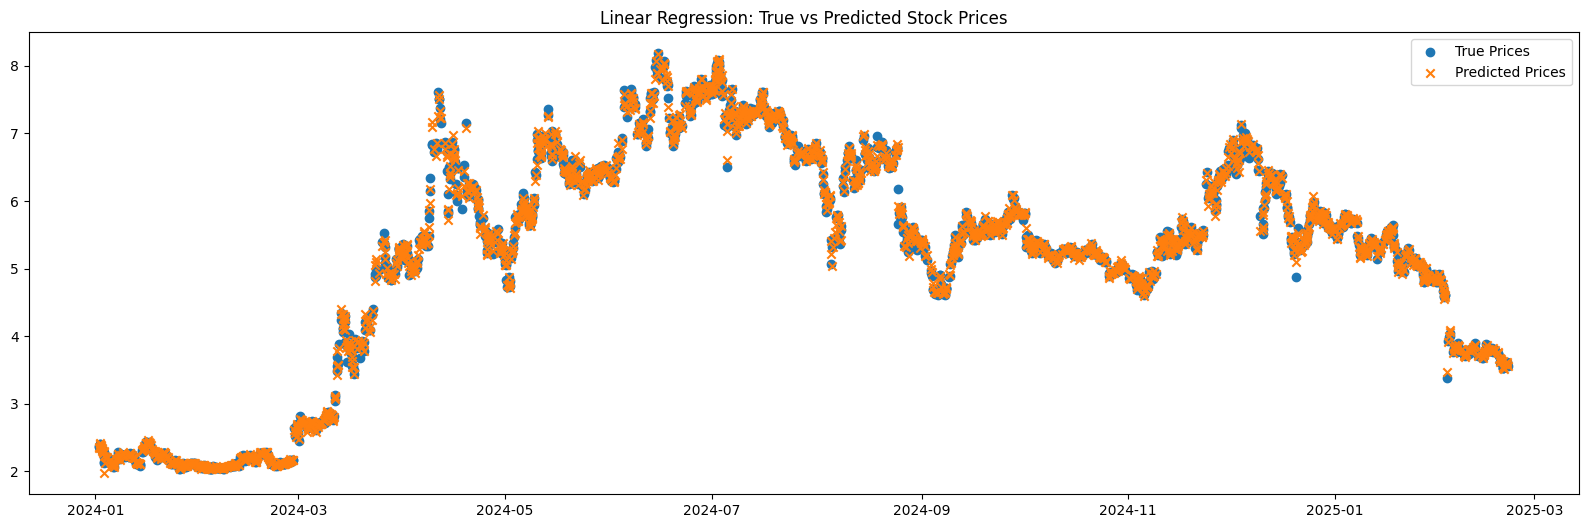

In [15]:
# Visualize the prediction vs true values
plt.figure(figsize=(20,6))
plt.scatter(y_test.index, y_test, label='True Prices', marker='o')
plt.scatter(y_test.index, y_pred_lr, label='Predicted Prices', marker='x')
plt.title("Linear Regression: True vs Predicted Stock Prices")
plt.legend()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2025-02-21 19:45:58.729395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 19:45:58.733306: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 19:45:58.747029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740154558.769757   27571 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740154558.776269   27571 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 19:45:58.799279: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [17]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

2025-02-21 19:46:00.956371: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/amyrmahdy/GitHub/StakeVision/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [18]:
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
callback = EarlyStopping(monitor='loss', patience=3)

history = model_lstm.fit(X_train, y_train, verbose = 1, epochs=500, batch_size=32, callbacks = [callback])

Epoch 1/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8.0145
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3432
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2420
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2171
Epoch 5/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2045
Epoch 6/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1850
Epoch 7/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1882
Epoch 8/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1819
Epoch 9/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1766
Epoch 10/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1698
Epoch 11/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1902
Epoch 12/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1640
Epoch 13/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1645
Epoch 14/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1672
Epoch 15/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2

In [19]:
# Predict the stock price using the test set
y_pred_lstm = model_lstm.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [20]:
mse_lstm = mean_squared_error(y_test,y_pred_lstm)
print("Mean Squared Error LSTM:", mse_lstm)

Mean Squared Error LSTM: 0.004680486395955086


In [21]:
diff_prediction['y_pred_lstm'] = y_pred_lstm
diff_prediction['diff_lstm'] =  (y_test - y_pred_lstm).values.flatten().tolist()
diff_prediction

,y_pred_lr,y_test,diff_lr,y_pred_lstm,diff_lstm
0,5.383104,5.3857,0.002596,5.360658,0.025042
1,5.628957,5.7122,0.083243,5.626042,0.086158
2,5.576248,5.5729,-0.003348,5.559319,0.013581
3,6.126839,6.1898,0.062961,6.127865,0.061935
4,2.292916,2.2108,-0.082116,2.294254,-0.083454
...,...,...,...,...,...
1993,6.811186,6.6637,-0.147486,6.819270,-0.155570
1994,5.420536,5.4276,0.007064,5.431158,-0.003558
1995,3.511521,3.5445,0.032979,3.588415,-0.043915
1996,2.283604,2.2486,-0.035004,2.284671,-0.036071


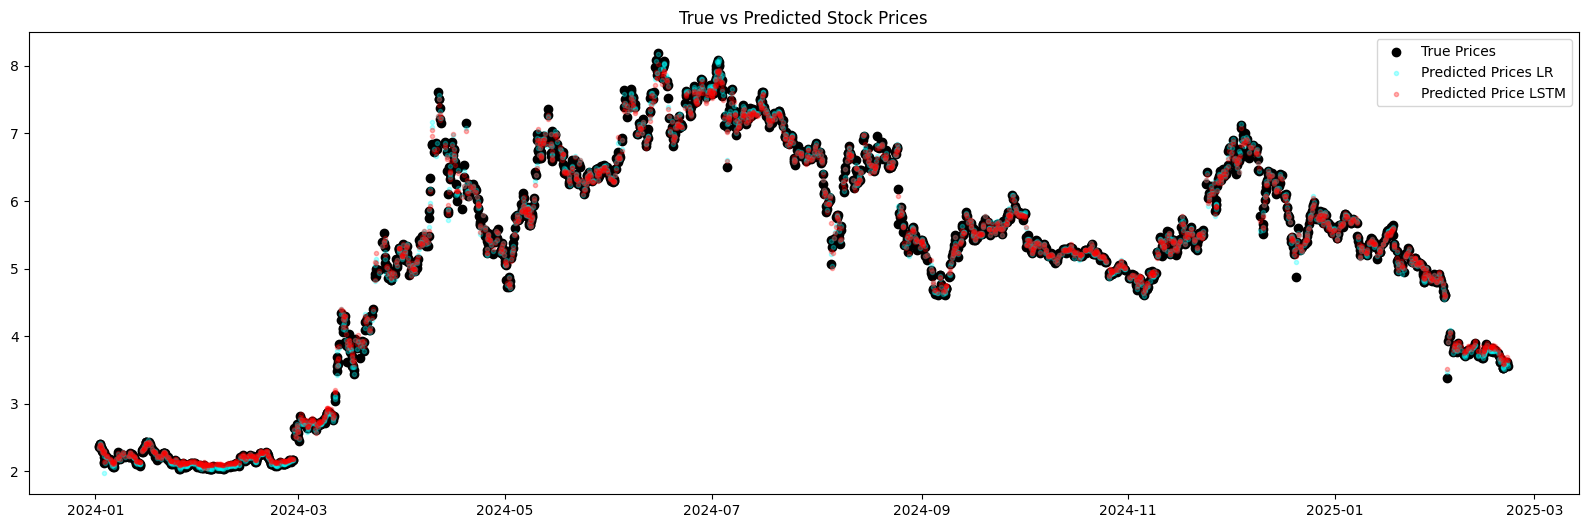

In [22]:
# Visualize the prediction vs true values
plt.figure(figsize=(20,6))
plt.scatter(y_test.index, y_test, label='True Prices', marker='o',alpha= 1, c = 'black')
plt.scatter(y_test.index, y_pred_lr, label='Predicted Prices LR', marker='.',alpha= 0.3, c = 'aqua')
plt.scatter(y_test.index, y_pred_lstm, label='Predicted Price LSTM', marker='.',alpha= 0.3,c = 'red')
plt.title("True vs Predicted Stock Prices")
plt.legend()
plt.show()

In [26]:
real_test

,epoch,open,high,low,close,volume,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2025-02-21 08:30:00,1740114000000,3.5897,3.5983,3.5751,3.5828,71946.430,2025,2,21,8,30,0
2025-02-21 09:30:00,1740117600000,3.5824,3.5923,3.5770,3.5891,22940.018,2025,2,21,9,30,0
2025-02-21 10:30:00,1740121200000,3.5884,3.6108,3.5872,3.5930,17760.412,2025,2,21,10,30,0
2025-02-21 11:30:00,1740124800000,3.5935,3.6062,3.5878,3.6052,59698.094,2025,2,21,11,30,0
2025-02-21 12:30:00,1740128400000,3.6053,3.6477,3.6053,3.6331,85176.000,2025,2,21,12,30,0
2025-02-21 13:30:00,1740132000000,3.6336,3.6533,3.6308,3.6407,70430.580,2025,2,21,13,30,0
2025-02-21 14:30:00,1740135600000,3.6410,3.6612,3.6288,3.6431,69829.230,2025,2,21,14,30,0
2025-02-21 15:30:00,1740139200000,3.6427,3.6630,3.6400,3.6592,57995.676,2025,2,21,15,30,0
2025-02-21 16:30:00,1740142800000,3.6592,3.7100,3.6532,3.6933,80900.760,2025,2,21,16,30,0


In [46]:
real_test
# if we want to check real price on kucoin here is the formula:
# date in python is in Tehran time zone. So 2025-02-21 15:30:00	in this code will be equivalent of 12:00:00 in Kucoin timezone (UTC)

,epoch,open,high,low,close,volume,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2025-02-21 08:30:00,1740114000000,3.5897,3.5983,3.5751,3.5828,71946.430,2025,2,21,8,30,0
2025-02-21 09:30:00,1740117600000,3.5824,3.5923,3.5770,3.5891,22940.018,2025,2,21,9,30,0
2025-02-21 10:30:00,1740121200000,3.5884,3.6108,3.5872,3.5930,17760.412,2025,2,21,10,30,0
2025-02-21 11:30:00,1740124800000,3.5935,3.6062,3.5878,3.6052,59698.094,2025,2,21,11,30,0
2025-02-21 12:30:00,1740128400000,3.6053,3.6477,3.6053,3.6331,85176.000,2025,2,21,12,30,0
2025-02-21 13:30:00,1740132000000,3.6336,3.6533,3.6308,3.6407,70430.580,2025,2,21,13,30,0
2025-02-21 14:30:00,1740135600000,3.6410,3.6612,3.6288,3.6431,69829.230,2025,2,21,14,30,0
2025-02-21 15:30:00,1740139200000,3.6427,3.6630,3.6400,3.6592,57995.676,2025,2,21,15,30,0
2025-02-21 16:30:00,1740142800000,3.6592,3.7100,3.6532,3.6933,80900.760,2025,2,21,16,30,0


In [30]:
real_test_X, real_test_y = real_test.drop(['close','epoch','second'],axis = 1), real_test['close']
real_test_pred = model_lr.predict(real_test_X)

In [47]:
real_test_pred

array([[3.58677718],
       [3.58640202],
       [3.60409345],
       [3.59875062],
       [3.63551825],
       [3.64533823],
       [3.64730421],
       [3.65481845],
       [3.69145757],
       [3.68617442]])

In [32]:
mean_squared_error(real_test_y, real_test_pred)

2.5755914601009246e-05

In [ ]:
real_test_X, real_test_y

(                       open    high     low     volume  year  month  day  \
 date                                                                       
 2025-02-21 08:30:00  3.5897  3.5983  3.5751  71946.430  2025      2   21   
 2025-02-21 09:30:00  3.5824  3.5923  3.5770  22940.018  2025      2   21   
 2025-02-21 10:30:00  3.5884  3.6108  3.5872  17760.412  2025      2   21   
 2025-02-21 11:30:00  3.5935  3.6062  3.5878  59698.094  2025      2   21   
 2025-02-21 12:30:00  3.6053  3.6477  3.6053  85176.000  2025      2   21   
 2025-02-21 13:30:00  3.6336  3.6533  3.6308  70430.580  2025      2   21   
 2025-02-21 14:30:00  3.6410  3.6612  3.6288  69829.230  2025      2   21   
 2025-02-21 15:30:00  3.6427  3.6630  3.6400  57995.676  2025      2   21   
 2025-02-21 16:30:00  3.6592  3.7100  3.6532  80900.760  2025      2   21   
 2025-02-21 17:30:00  3.6948  3.7025  3.6732  26828.820  2025      2   21   
 
                      hour  minute  
 date                               
